In [8]:
#エクセルファイルの変換を目指して
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file_name = 'B39 restraint R2'
file = pd.ExcelFile(file_name+'.xls')
#all_df = pd.DataFrame()
time_file = open(file_name+'_time_data.csv', 'w')


sheet_df = file.parse(file.sheet_names, header=None)
all_df = pd.DataFrame()

sheet_names = file.sheet_names
for j, name in enumerate(sheet_names):
    sheet_df[j] = file.parse(name)


estimated delay is -118_0_1


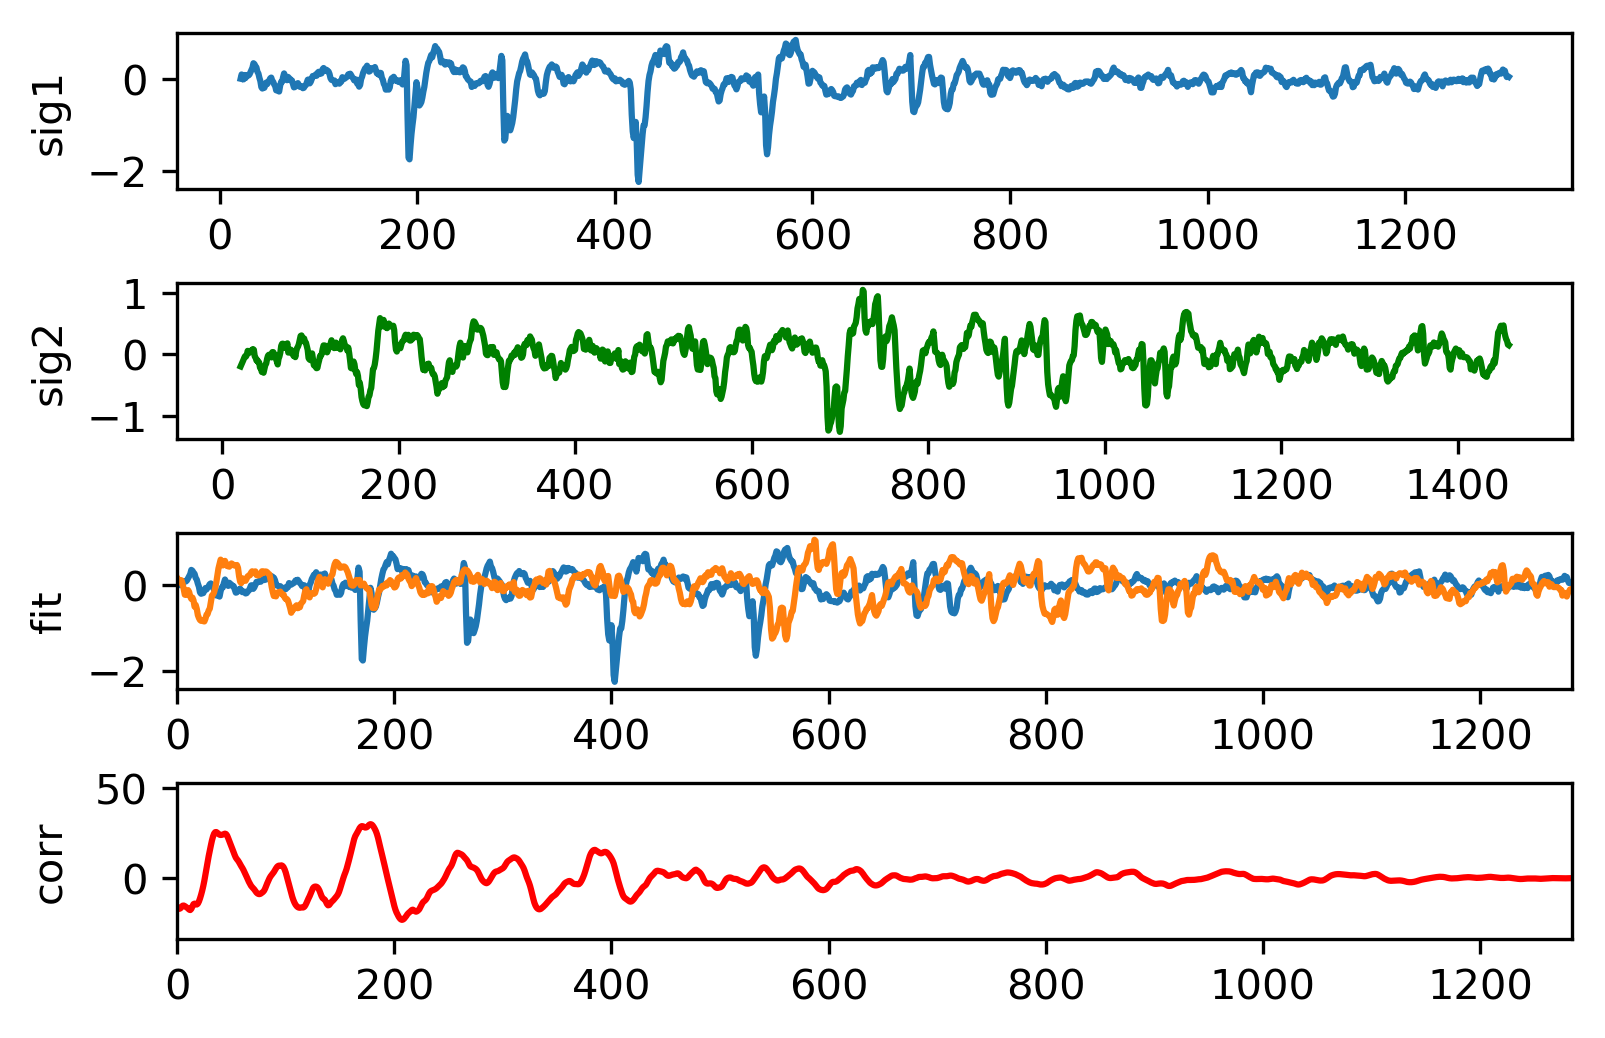

In [11]:
i = 0
j = 1
end_number = (np.where(sheet_df[i]['INFORMATION']=="CHANNEL")[0][1])
sig1 = (sheet_df[i]['INFORMATION'][21:end_number-2])
sig1 = sig1 - sig1.mean()

end_number = (np.where(sheet_df[j]['INFORMATION']=="CHANNEL")[0][1])
sig2 = (sheet_df[j]['INFORMATION'][21:end_number-2])
sig2 = sig2 - sig2.mean()
corr = np.correlate(sig1, sig2, "full")
estimated_delay = corr.argmax() - (len(sig1) - 1)
print("estimated delay is " + str(estimated_delay)+ "_" + str(i) +"_"+ str(j))

fig = plt.figure(figsize=(6, 4), dpi=300)
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.subplot(4, 1, 1)
plt.ylabel("sig1")
plt.plot(sig1)
       
plt.subplot(4, 1, 2)
plt.ylabel("sig2")
plt.plot(sig2, color="g")

plt.subplot(4, 1, 3)
plt.ylabel("fit")
plt.plot(np.arange(len(sig1)), sig1)
plt.plot(np.arange(len(sig2)) + estimated_delay, sig2 )
plt.xlim([0, len(sig1)])

plt.subplot(4, 1, 4)
plt.ylabel("corr")
plt.plot(np.arange(len(corr)) - len(sig2) + 1, corr, color="r")
plt.xlim([0, len(sig1)])

fig.align_labels()
plt.savefig("./image/"+ str(i) +"_"+ str(j) +".pdf")
        

file.close()
time_file.close()
#print(all_df)

#import xlrd
#file = xlrd.open_workbook('B39 restraint R2.xls')
#print(file.nsheets)

#all_df.to_csv("otamesi.csv", header=False, index=False)
